In [156]:
%matplotlib inline
import os
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageEnhance
import pandas as pd

import cv2

from numpy.random import random, permutation
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom

import keras
from keras import backend as K
from keras.utils.data_utils import get_file
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD, RMSprop
from keras.preprocessing import image

ImportError: No module named keras

In [ ]:
FILES_PATH = 'http://www.platform.ai/models/'; CLASS_FILE='http://www.platform.ai/models/imagenet_class_index.json'
# Keras' get_file() is a handy function that downloads files, and caches them for re-use later
fpath = get_file(CLASS_FILE, FILES_PATH+CLASS_FILE, cache_subdir='models')
with open(fpath) as f: class_dict = json.load(f)
# Convert dictionary with string indexes into an array
classes = [class_dict[str(i)][1] for i in range(len(class_dict))]

In [184]:
img_path ='/Users/yizhuangfang/Dropbox/ImageProcessing/FireDamageS_TN/'

In [186]:
from subprocess import check_output
print(check_output(["ls", img_path + "train/Burned"]).decode("utf8"))

Burned.1.png
Burned.10.png
Burned.100.png
Burned.100_out.jpg
Burned.10_out.jpg
Burned.11.png
Burned.11_out.jpg
Burned.12.png
Burned.12_out.jpg
Burned.13.png
Burned.13_out.jpg
Burned.14.png
Burned.14_out.jpg
Burned.15.png
Burned.15_out.jpg
Burned.16.png
Burned.16_out.jpg
Burned.17.png
Burned.17_out.jpg
Burned.18.png
Burned.18_out.jpg
Burned.19.png
Burned.19_out.jpg
Burned.1_out.jpg
Burned.2.png
Burned.20.png
Burned.20_out.jpg
Burned.21.png
Burned.21_out.jpg
Burned.22.png
Burned.22_out.jpg
Burned.23.png
Burned.23_out.jpg
Burned.24.png
Burned.24_out.jpg
Burned.25.png
Burned.25_out.jpg
Burned.26.png
Burned.26_out.jpg
Burned.27.png
Burned.27_out.jpg
Burned.28.png
Burned.28_out.jpg
Burned.29.png
Burned.29_out.jpg
Burned.2_out.jpg
Burned.3.png
Burned.30.png
Burned.30_out.jpg
Burned.31.png
Burned.31_out.jpg
Burned.32.png
Burned.32_out.jpg
Burned.33.png
Burned.33_out.jpg
Burned.34.png
Burned.34_out.jpg
Burned.35.png
Burned.35_out.jpg
Burned.36.png
Burned.36_out.jpg
Burned.37.png
Burned.37_out.j

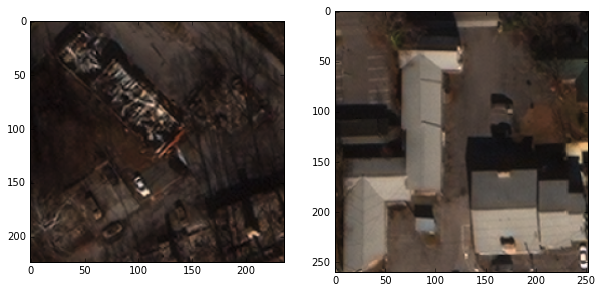

In [128]:
b1 = Image.open(img_path + 'train/Burned/Burned.99.png')
i1 = Image.open(img_path + 'train/Intact/Intact.1.png')
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(b1)
plt.subplot(122)
plt.imshow(i1)
#using np.shape check original .png is a 4bands image, probably RGBA.

In [167]:
for img in glob.glob("train/Burned/*.png"):
    file, ext = os.path.splitext(img)
    im = Image.open(img)
    im.convert()
    ImageEnhance.Contrast(im)
    im.enhance(2)
    im.save(file + "_out.jpg", "JPEG")

AttributeError: enhance

In [181]:
for img in glob.glob("train/Intact/*.png"):
    file, ext = os.path.splitext(img)
    im = Image.open(img)
    im.convert()
    #ImageEnhance.Contrast(im)
    #im.enhence().show
    im.save(file + "_out.jpg", "JPEG")

In [170]:
for img in glob.glob("valid/Burned/*.png"):
    file, ext = os.path.splitext(img)
    im = Image.open(img)
    im.convert()
    im.save(file + "_out.jpg", "JPEG")

In [171]:
for img in glob.glob("valid/Intact/*.png"):
    file, ext = os.path.splitext(img)
    im = Image.open(img)
    im.convert()
    im.save(file + "_out.jpg", "JPEG")

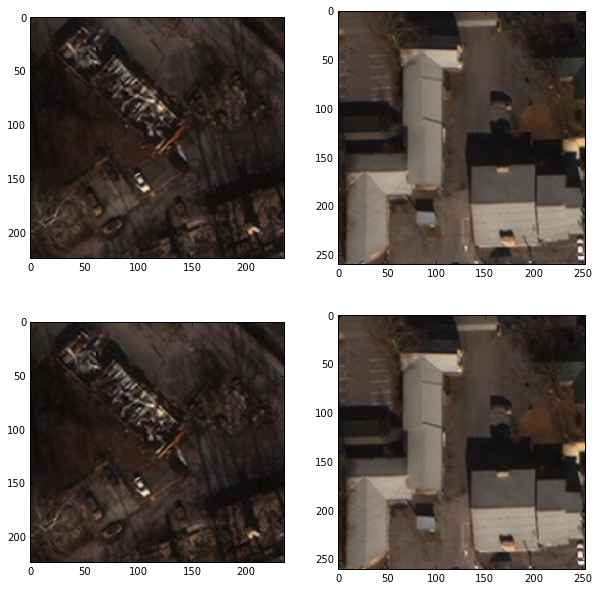

In [172]:
b2 = Image.open(img_path + 'train/Burned/Burned.99_out.jpg')
i2 = Image.open(img_path + 'train/Intact/Intact.1_out.jpg')
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(b1)
plt.subplot(222)
plt.imshow(i1)
plt.subplot(223)
plt.imshow(b2)
plt.subplot(224)
plt.imshow(i2)

In [150]:
np.shape(b2), np.shape(i2),np.shape(b1), np.shape(i1)

((224, 236, 3), (260, 253, 3), (224, 236, 4), (260, 253, 4))

In [149]:
np.min(b2), np.max(b2),np.min(b1), np.max(b1)

(0, 255, 1, 255)

In [173]:
i2_E = ImageEnhance.Contrast(i2)
#b2_E.image.show()
i2_E.enhance(2).show()


In [177]:
i2_B=ImageEnhance.Brightness(i2)
i2_B.image.show()